Text(0.5, 0, '$E$ / $\\text{GeV}$')

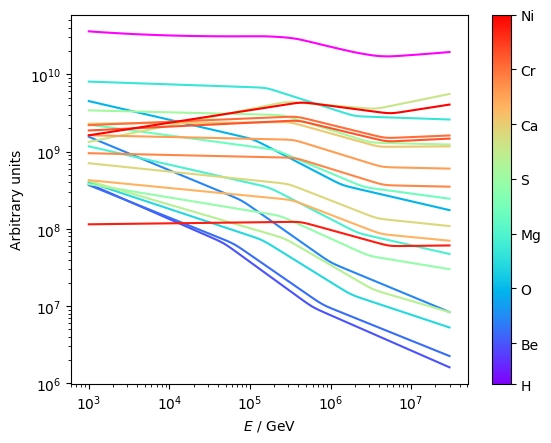

In [1]:
import matplotlib as mpl
from matplotlib import colors
from matplotlib.cm import ScalarMappable
from cr_knee_fit.cr_model import CosmicRaysModel, UnresolvedElementsSpectrum, SpectralBreak
from cr_knee_fit.elements import Z_to_element_name, unresolved_element_names, element_name_to_Z_A
import numpy as np

from cr_knee_fit.utils import E_GEV_LABEL


model = CosmicRaysModel(
    base_spectra=[],
    breaks=[
        SpectralBreak(lg_break=4.2, d_alpha=0.3, lg_sharpness=np.log(3)),
        SpectralBreak(lg_break=5.3, d_alpha=-0.3, lg_sharpness=np.log(3)),
    ],
    all_particle_lg_shift=None,
    free_Z=None,
    unresolved_elements_spectrum=UnresolvedElementsSpectrum(lgI=1),
)

Emin = 1e3
Emax = 3e7
scale = 2.6

ax = model.plot(Emin=Emin, Emax=Emax, scale=scale)
fig = ax.figure
assert fig is not None

E_grid = np.geomspace(Emin, Emax, 100)
E_factor = E_grid**scale
Z_max = 28
cmap = mpl.colormaps["rainbow"]
for unres_el in unresolved_element_names:
    Z = element_name_to_Z_A[unres_el][0]
    ax.plot(
        E_grid,
        (E_factor * model.compute(E_grid, element=unres_el)),
        label=unres_el,
        color=cmap(Z / Z_max),
    )
cbar_primary_Zs = np.linspace(0, Z_max - 1, 8, dtype=int)
fig.colorbar(
    ScalarMappable(norm=colors.Normalize(vmin=0, vmax=Z_max - 1), cmap=cmap),
    ax=ax,
    ticks=cbar_primary_Zs,
    format=lambda param, _: Z_to_element_name[int(param) + 1],
)
ax.loglog()
ax.set_ylabel("Arbitrary units")
ax.set_xlabel(E_GEV_LABEL)